In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
model = keras.models.load_model(
    filepath="./LaneNet/full_CNN_model.h5")


(720, 1280, 3)
(720, 1280, 3)


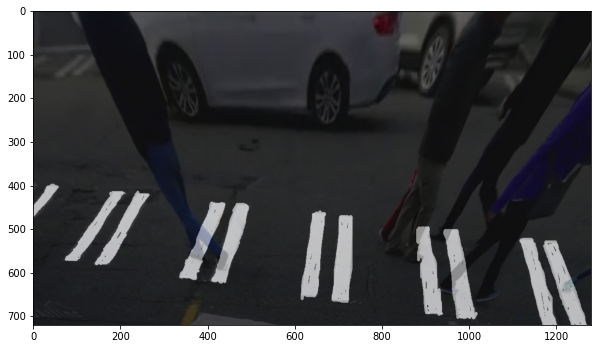

In [17]:
from keras.preprocessing.image import load_img
import os
from keras.preprocessing.image import img_to_array
input_directory = './Dataset 3/Day Time/inputs'
label_directory = './Dataset 3/Day Time/labels'
def view_img(index):
    
    
    input_img = load_img(
        f"{os.path.join(input_directory,'Lane_Input_'+str(index+1)+'.png')}")
    label_img = load_img(
        f"{os.path.join(label_directory,'Lane_Input_'+str(index+1)+'_Label.png')}")
    input_arr = img_to_array(input_img)
    label_arr = img_to_array(label_img)
    print(np.shape(input_arr))
    print(np.shape(label_arr))
    plt.figure(figsize=(10,10))
    plt.imshow(input_img)
    plt.imshow(label_img,alpha=0.5)
view_img(0)


In [13]:
input_i = 0
label_i = 0


In [27]:
def get_input_index(fname):
    i=fname.index('t')
    i=i+2
    t=fname.index('.')
    return int(fname[i:t])
def get_label_index(fname):
    i=fname.index('t')
    i=i+2
    t=fname.rindex('_')
    return int(fname[i:t])



In [28]:
input_img_names = os.listdir(os.path.join(input_directory))
label_img_names = os.listdir(os.path.join(label_directory))
input_img_names.sort(key=get_input_index)
label_img_names.sort(key=get_label_index)

In [29]:
print(label_img_names[0:10])
print(input_img_names[0:10])


['Lane_Input_1_Label.png', 'Lane_Input_2_Label.png', 'Lane_Input_3_Label.png', 'Lane_Input_4_Label.png', 'Lane_Input_5_Label.png', 'Lane_Input_6_Label.png', 'Lane_Input_7_Label.png', 'Lane_Input_8_Label.png', 'Lane_Input_9_Label.png', 'Lane_Input_10_Label.png']
['Lane_Input_1.png', 'Lane_Input_2.png', 'Lane_Input_3.png', 'Lane_Input_4.png', 'Lane_Input_5.png', 'Lane_Input_6.png', 'Lane_Input_7.png', 'Lane_Input_8.png', 'Lane_Input_9.png', 'Lane_Input_10.png']


In [98]:
train_images = []
train_labels = []


for i in input_img_names:

    url = 'Dataset 3/Day Time/inputs/'+i
    
    img = tf.keras.utils.load_img(url,target_size=(80,160))
    img_arr=np.array(img)
    
    train_images.append(tf.convert_to_tensor(img_arr))
print(train_images[0])


tf.Tensor(
[[[ 91  94  99]
  [ 90  93  98]
  [ 81  84  89]
  ...
  [ 30  30  30]
  [ 30  30  30]
  [ 31  31  31]]

 [[ 92  95 102]
  [ 90  93  98]
  [ 82  85  90]
  ...
  [ 30  30  30]
  [ 30  30  30]
  [ 31  31  31]]

 [[ 93  96 103]
  [ 87  90  95]
  [ 81  84  89]
  ...
  [ 30  30  30]
  [ 31  31  31]
  [ 31  31  31]]

 ...

 [[ 54  57  62]
  [ 56  59  64]
  [ 82  85  90]
  ...
  [119 121 123]
  [ 61  62  67]
  [ 57  62  68]]

 [[ 38  41  48]
  [ 44  47  52]
  [ 43  46  51]
  ...
  [121 121 129]
  [ 60  63  69]
  [ 56  59  64]]

 [[ 50  53  58]
  [ 49  53  56]
  [ 53  57  60]
  ...
  [122 123 127]
  [109 110 115]
  [ 57  61  64]]], shape=(80, 160, 3), dtype=uint8)


In [99]:

for i in label_img_names:

    url = 'Dataset 3/Day Time/labels/'+i

    img = tf.keras.utils.load_img(url, target_size=(80, 160))
    img_arr = np.array(img)

    train_labels.append(tf.convert_to_tensor(img_arr))
print(train_labels[0])


tf.Tensor(
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [255 255 255]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [255 255 255]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [255 255 255]
  [255 255 255]
  [  0   0   0]]], shape=(80, 160, 3), dtype=uint8)


In [100]:
for i in range(len(train_labels)):
    x=tf.math.reduce_max(
    train_labels[i], axis=2, keepdims=False, name=None
    )
    train_labels[i]=x




In [101]:

for i in range(len(train_labels)):
    x = tf.expand_dims(train_labels[i], axis=2)
    train_labels[i] = x


In [102]:
train_labels[0].shape

TensorShape([80, 160, 1])

In [103]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 80, 160, 3)       12        
 ormalization)                                                   
                                                                 
 Conv1 (Conv2D)              (None, 78, 158, 8)        224       
                                                                 
 Conv2 (Conv2D)              (None, 76, 156, 16)       1168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 38, 78, 16)       0         
 )                                                               
                                                                 
 Conv3 (Conv2D)              (None, 36, 76, 16)        2320      
                                                                 
 dropout (Dropout)           (None, 36, 76, 16)        0

In [72]:
def scale_img(image):
    image=tf.cast(image,tf.float32)
    image=image/255.0
    return image





In [104]:
train_labels[0]

<tf.Tensor: shape=(80, 160, 1), dtype=uint8, numpy=
array([[[  0],
        [  0],
        [  0],
        ...,
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        ...,
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        ...,
        [  0],
        [  0],
        [  0]],

       ...,

       [[  0],
        [  0],
        [  0],
        ...,
        [255],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        ...,
        [255],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        ...,
        [255],
        [255],
        [  0]]], dtype=uint8)>

In [105]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(train_images, train_labels,
                                                  test_size=0.2,
                                                  random_state=0
                                                  )
print(np.shape(train_X))
train_X = tf.data.Dataset.from_tensor_slices(train_X)
val_X = tf.data.Dataset.from_tensor_slices(val_X)
train_y = tf.data.Dataset.from_tensor_slices(train_y)
val_y = tf.data.Dataset.from_tensor_slices(val_y)
train_X.element_spec, train_y.element_spec, val_X.element_spec, val_y.element_spec


(536, 80, 160, 3)


(TensorSpec(shape=(80, 160, 3), dtype=tf.uint8, name=None),
 TensorSpec(shape=(80, 160, 1), dtype=tf.uint8, name=None),
 TensorSpec(shape=(80, 160, 3), dtype=tf.uint8, name=None),
 TensorSpec(shape=(80, 160, 1), dtype=tf.uint8, name=None))

<TensorSliceDataset element_spec=TensorSpec(shape=(80, 160, 3), dtype=tf.uint8, name=None)>


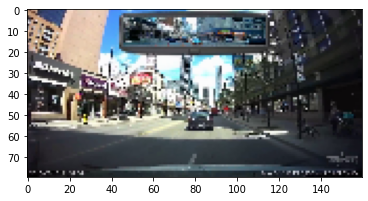

In [106]:
print(train_X)
train = tf.data.Dataset.zip((train_X, train_y))
val = tf.data.Dataset.zip((val_X, val_y))
example = next(iter(train))

plt.imshow(example[0])

plt.show()


In [107]:
def brightness(img, mask):
     img = tf.image.adjust_brightness(img, 0.1)
     return img, mask

def gamma(img, mask):
     img = tf.image.adjust_gamma(img, 0.1)
     return img, mask

def hue(img, mask):
     img = tf.image.adjust_hue(img, -0.1)
     return img, mask
def flip_hori(img, mask):
     img = tf.image.flip_left_right(img)
     mask = tf.image.flip_left_right(mask)
     return img, mask

def flip_vert(img, mask):
     img = tf.image.flip_up_down(img)
     mask = tf.image.flip_up_down(mask)
     return img, mask

def rotate(img, mask):
     img = tf.image.rot90(img)
     mask = tf.image.rot90(mask)
     return img, mask 


In [118]:
train = tf.data.Dataset.zip((train_X, train_y))
val = tf.data.Dataset.zip((val_X, val_y))


In [118]:
# a = train.map(brightness)
# b = train.map(gamma)
# c = train.map(hue)

# d = train.map(flip_hori)
# e = train.map(flip_vert)
# f = train.map(rotate)

# train = train.concatenate(a)
# train = train.concatenate(b)
# train = train.concatenate(c)
# train = train.concatenate(d)
# train = train.concatenate(e)
# train = train.concatenate(f)



In [119]:
BATCH = 64
AT = tf.data.AUTOTUNE
BUFFER = 1000
STEPS_PER_EPOCH = 32
VALIDATION_STEPS = 32
train = train.cache().shuffle(BUFFER).batch(BATCH).repeat()
train = train.prefetch(buffer_size=AT)
val = val.batch(BATCH)


In [123]:
history =model.fit(train, validation_data=val,
                   steps_per_epoch=STEPS_PER_EPOCH,
                   validation_steps=VALIDATION_STEPS,
          epochs=20)


Epoch 1/20
32/32 [==============================] - 60s 2s/step - loss: 576.9448 - accuracy: 0.8002 - val_loss: 582.2585 - val_accuracy: 0.7608
Epoch 2/20
32/32 [==============================] - 62s 2s/step - loss: 569.2827 - accuracy: 0.7917 - val_loss: 559.9301 - val_accuracy: 0.6668
Epoch 3/20
32/32 [==============================] - 63s 2s/step - loss: 547.5125 - accuracy: 0.8171 - val_loss: 551.5580 - val_accuracy: 0.7358
Epoch 4/20
32/32 [==============================] - 63s 2s/step - loss: 548.8918 - accuracy: 0.8245 - val_loss: 563.3777 - val_accuracy: 0.7756
Epoch 5/20
32/32 [==============================] - 63s 2s/step - loss: 527.5563 - accuracy: 0.8215 - val_loss: 541.6586 - val_accuracy: 0.6519
Epoch 6/20
32/32 [==============================] - 64s 2s/step - loss: 522.8968 - accuracy: 0.8428 - val_loss: 530.0820 - val_accuracy: 0.7904
Epoch 7/20
32/32 [==============================] - 65s 2s/step - loss: 517.9304 - accuracy: 0.8223 - val_loss: 527.9403 - val_accuracy:

(80, 160, 1)
(80, 160, 1)


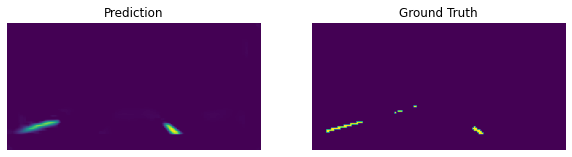

In [126]:
# model = keras.models.load_model(
#     filepath="./LaneNet/full_CNN_model.h5")
img, mask = next(iter(train))
pred = model.predict(img)

plt.figure(figsize=(10, 5))
for i in pred:
     plt.subplot(121)
     print(i.shape)
     plt.imshow(i)
     plt.axis('off')
     plt.title('Prediction')
     break
print(mask[0].shape)
plt.subplot(122)
plt.imshow(mask[0])
plt.axis('off')
plt.title('Ground Truth')
plt.show()


In [128]:
model.save('trained_UNet.h5')

(80, 160)


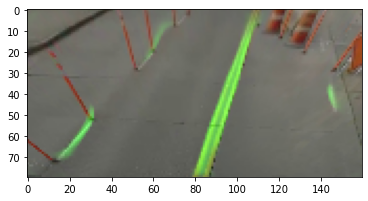

In [172]:
def view_result(index):
    img=train_images[index].numpy()
    original_img=img
    img=img[None,:,:,:]
    res=model.predict(img)[0]
    
    
    blanks = np.zeros((res.shape[0], res.shape[1], 3))
    print(res[:, :,0].shape)
    blanks[:, :, 1] = blanks[:, :, 1]+res[:,:,0]
    lane=blanks.astype('uint8')
    result = cv2.addWeighted(original_img, 1, lane, 1, 0)
    plt.imshow(result)
view_result(10)
    
